In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Set up the plot style
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Load all data files with proper datetime handling
print("⏳ Loading data files...")
try:
    # Load ATS data - using 'time[d]' column
    ats = pd.read_csv("ATS_meter.csv")
    ats['DateTime'] = pd.to_datetime(ats['time[d]'], unit='D', origin=pd.Timestamp('2021-01-01'))
    print("✅ Loaded ATS data:", ats.shape)
    
    # Load Discharge data
    discharge = pd.read_csv("Discharge_2021-2023.csv", parse_dates=['DateTime'])
    print("✅ Loaded Discharge data:", discharge.shape)
    
    # Load ET data (optional)
    et = pd.read_csv("ET_2021-2023.csv", parse_dates=['DateTime'])
    print("✅ Loaded ET data:", et.shape)
    
    # Load Snow data (optional)
    snow = pd.read_csv("Snow_2021-2023.csv", parse_dates=['DateTime'])
    print("✅ Loaded Snow data:", snow.shape)

except FileNotFoundError as e:
    print(f"❌ Error: {str(e)}")
    exit()

# 2. Prepare the data for plotting
print("\n⏳ Preparing plot data...")

# Convert ATS time from days since 2021-01-01 to datetime
if 'time[d]' in ats.columns:
    ats['DateTime'] = pd.to_datetime(ats['time[d]'], unit='D', origin=pd.Timestamp('2021-01-01'))

# Merge data on DateTime
merged = pd.merge(
    ats[['DateTime', 'net runoff [m^3 d^-1]']],
    discharge[['DateTime', 'Discharge_m3_day']],
    on='DateTime',
    how='inner'
)

# 3. Create the comparison plot
print("⏳ Creating plot...")
fig, ax = plt.subplots(figsize=(14, 7))

# Plot ATS Net Runoff
ax.plot(
    merged['DateTime'],
    merged['net runoff [m^3 d^-1]'],
    label='ATS Modeled Runoff',
    color='#1f77b4',  # Blue
    linewidth=1.5
)

# Plot Observed Discharge
ax.plot(
    merged['DateTime'],
    merged['Discharge_m3_day'],
    label='Observed Discharge',
    color='#d62728',  # Red
    linewidth=1.5,
    linestyle='--'
)

# Formatting
ax.set_title('Modeled vs Observed Discharge (2021-2023)', fontsize=14, pad=20)
ax.set_ylabel('Discharge (m³/day)', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.legend(fontsize=12, framealpha=1)
ax.grid(True, alpha=0.3)

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()

# 4. Save and show the plot
output_file = "Modeled_vs_Observed_Discharge.png"
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"\n✅ Saved plot as: {output_file}")
plt.show()

# 5. Display statistics
print("\n📊 Comparison Statistics:")
print(f"Date Range: {merged['DateTime'].min().date()} to {merged['DateTime'].max().date()}")
print(f"ATS Mean Runoff: {merged['net runoff [m^3 d^-1]'].mean():,.2f} m³/day")
print(f"Observed Mean Discharge: {merged['Discharge_m3_day'].mean():,.2f} m³/day")
print(f"Pearson Correlation: {merged['net runoff [m^3 d^-1]'].corr(merged['Discharge_m3_day']):.3f}")
print(f"Number of Comparison Points: {len(merged):,}")

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into pandas dataframes
ats_meter = pd.read_csv('ATS_meter.csv')
discharge = pd.read_csv('Discharge_2021-2023.csv')

# Convert the 'time' column to datetime in both dataframes (if it's not already in datetime format)
ats_meter['time[d]'] = pd.to_datetime(ats_meter['time[d]'])
discharge['DateTime'] = pd.to_datetime(discharge['time'])

# Extract the relevant columns
net_runoff = ats_meter['net runoff [m^3 d^-1]']
discharge_m3_day = discharge['Discharge_m3_day']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(ats_meter['time[d]'], net_runoff, label='Net Runoff [m³/d]', color='blue')
plt.plot(discharge['time'], discharge_m3_day, label='Discharge [m³/day]', color='green')

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Flow [m³/day]')
plt.title('Net Runoff and Discharge vs Time')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'time[d]'

In [65]:
import pandas as pd

# Load the CSV file
ats_meter = pd.read_csv('ATS_meter.csv')

# Display the column names to check for any discrepancies
print(ats_meter.columns)

Index(['time [d]', 'net runoff [mol d^-1]', 'runoff only [mol d^-1]',
       'runon only [mol d^-1]', 'river discharge [mol d^-1]',
       'net groundwater flux [mol d^-1]', 'exfiltration [mol d^-1]',
       'rain precipitation [m d^-1]', 'snow precipitation [m d^-1]',
       'surface evaporation [m d^-1]', 'snow evaporation [m d^-1]',
       'transpiration [m d^-1]', 'total evapotranspiration [m d^-1]',
       'snowmelt [m d^-1]', 'canopy evaporation [m d^-1]',
       'canopy drainage [m d^-1]', 'water to surface [m d^-1]',
       'snow to surface [m d^-1]', 'canopy interception [m d^-1]',
       'surface water content [mol]', 'snow water content [mol]',
       'canopy water content [mol]', 'air temperature [K]',
       'snow water equivalent [m]', 'incoming shortwave radiation [W m^-2]',
       'subsurface water content [mol]', 'net runoff [m^3 d^-1]',
       'net runoff [m^3 s^-1]'],
      dtype='object')


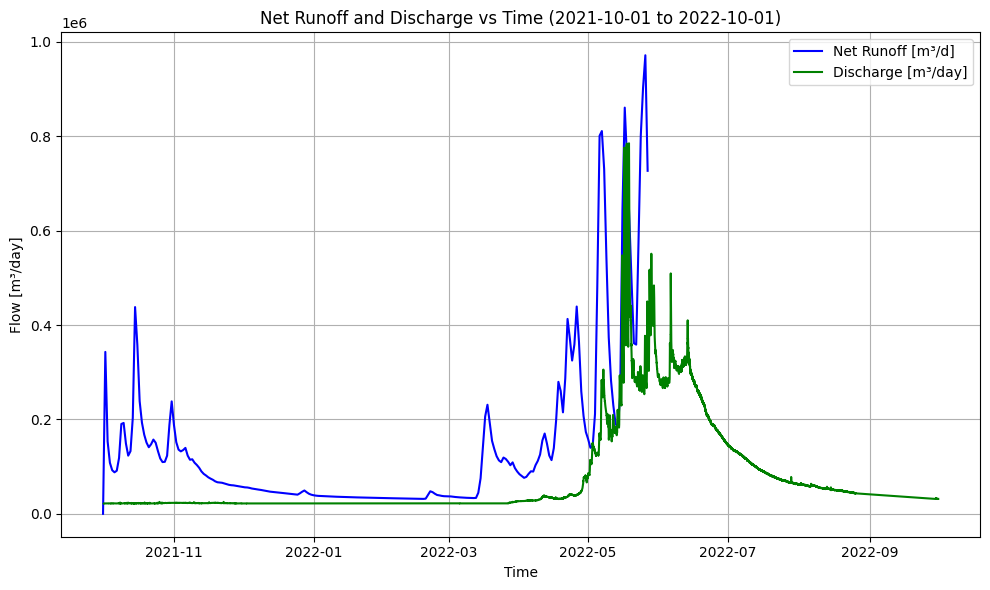

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into pandas dataframes
ats_meter = pd.read_csv('ATS_meter.csv')
discharge = pd.read_csv('Discharge_2021-2023.csv')

# Convert the 'time [d]' column to datetime in both dataframes (if it's not already in datetime format)
ats_meter['time [d]'] = pd.to_datetime(ats_meter['time [d]'])
discharge['time'] = pd.to_datetime(discharge['DateTime'])

# Define start and end dates
start_date = "2021-10-01"
end_date = "2022-10-01"

# Filter data based on the specified date range
ats_meter_filtered = ats_meter[(ats_meter['time [d]'] >= start_date) & (ats_meter['time [d]'] <= end_date)]
discharge_filtered = discharge[(discharge['time'] >= start_date) & (discharge['time'] <= end_date)]

# Extract the relevant columns
net_runoff = ats_meter_filtered['net runoff [m^3 d^-1]']
discharge_m3_day = discharge_filtered['Discharge_m3_day']
discharge_time = discharge_filtered['time']

# Remove negative values from discharge_m3_day
discharge_filtered = discharge_filtered[discharge_m3_day >= 0]
discharge_m3_day_filtered = discharge_filtered['Discharge_m3_day']
discharge_time_filtered = discharge_filtered['time']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(ats_meter_filtered['time [d]'], net_runoff, label='Net Runoff [m³/d]', color='blue')
plt.plot(discharge_time_filtered, discharge_m3_day_filtered, label='Discharge [m³/day]', color='green')

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Flow [m³/day]')
plt.title(f'Net Runoff and Discharge vs Time ({start_date} to {end_date})')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

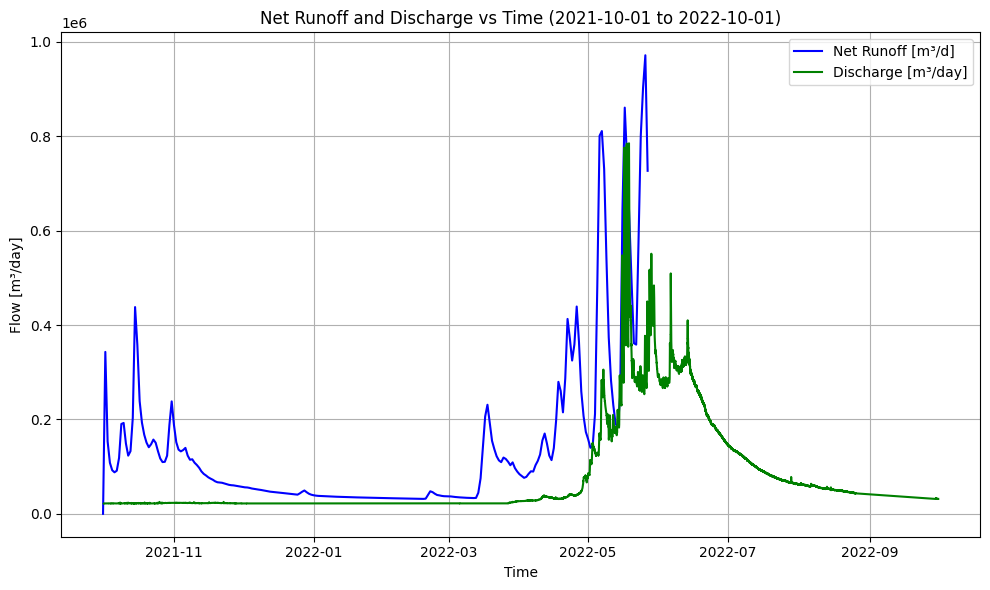

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into pandas dataframes
ats_meter = pd.read_csv('ATS_meter.csv')
discharge = pd.read_csv('Discharge_2021-2023.csv')

# Convert the 'time [d]' column to datetime in both dataframes (if it's not already in datetime format)
ats_meter['time [d]'] = pd.to_datetime(ats_meter['time [d]'])
discharge['time'] = pd.to_datetime(discharge['DateTime'])

# Define start and end dates
start_date = "2021-10-01"
end_date = "2022-10-01"

# Filter data based on the specified date range
ats_meter_filtered = ats_meter[(ats_meter['time [d]'] >= start_date) & (ats_meter['time [d]'] <= end_date)]
discharge_filtered = discharge[(discharge['time'] >= start_date) & (discharge['time'] <= end_date)]

# Extract the relevant columns
net_runoff = ats_meter_filtered['net runoff [m^3 d^-1]']
discharge_m3_day = discharge_filtered['Discharge_m3_day']
discharge_time = discharge_filtered['time']

# Remove negative values from discharge_m3_day (completely ignore negative discharge values)
discharge_filtered = discharge_filtered[discharge_m3_day >= 0]
discharge_m3_day_filtered = discharge_filtered['Discharge_m3_day']
discharge_time_filtered = discharge_filtered['time']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(ats_meter_filtered['time [d]'], net_runoff, label='Net Runoff [m³/d]', color='blue')
plt.plot(discharge_time_filtered, discharge_m3_day_filtered, label='Discharge [m³/day]', color='green')

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Flow [m³/day]')
plt.title(f'Net Runoff and Discharge vs Time ({start_date} to {end_date})')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

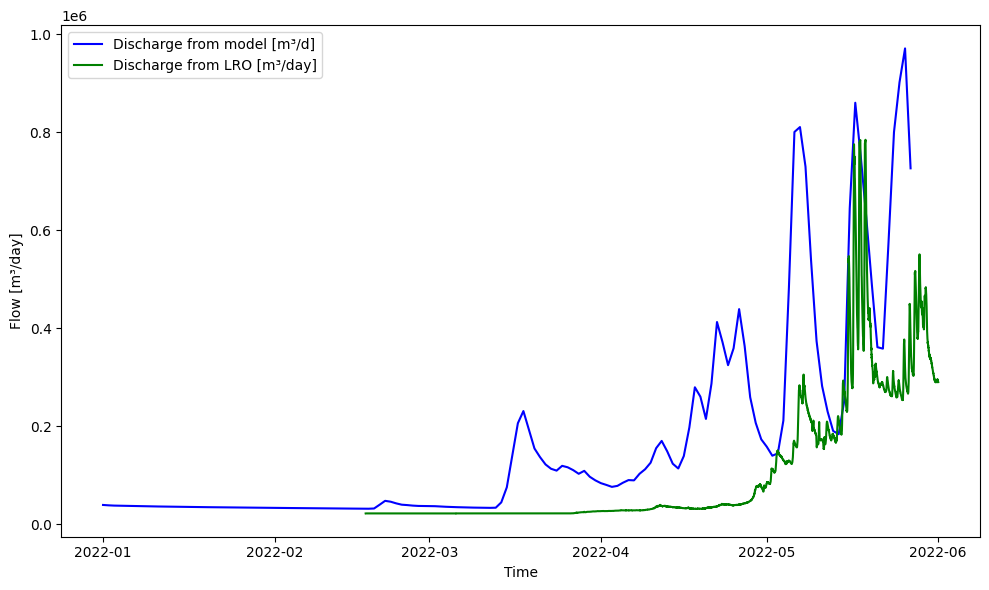

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into pandas dataframes
ats_meter = pd.read_csv('ATS_meter.csv')
discharge = pd.read_csv('Discharge_2021-2023.csv')

# Convert the 'time [d]' column to datetime in both dataframes (if it's not already in datetime format)
ats_meter['time [d]'] = pd.to_datetime(ats_meter['time [d]'])
discharge['time'] = pd.to_datetime(discharge['DateTime'])

# Define start and end dates for the first 6 months of 2022
start_date = "2022-01-01"
end_date = "2022-06-1"

# Filter data based on the specified date range
ats_meter_filtered = ats_meter[(ats_meter['time [d]'] >= start_date) & (ats_meter['time [d]'] <= end_date)]
discharge_filtered = discharge[(discharge['time'] >= start_date) & (discharge['time'] <= end_date)]

# Extract the relevant columns
net_runoff = ats_meter_filtered['net runoff [m^3 d^-1]']
discharge_m3_day = discharge_filtered['Discharge_m3_day']
discharge_time = discharge_filtered['time']

# Remove negative values from discharge_m3_day (completely ignore negative discharge values)
discharge_filtered = discharge_filtered[discharge_m3_day >= 0]
discharge_m3_day_filtered = discharge_filtered['Discharge_m3_day']
discharge_time_filtered = discharge_filtered['time']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(ats_meter_filtered['time [d]'], net_runoff, label='Discharge from model [m³/d]', color='blue')
plt.plot(discharge_time_filtered, discharge_m3_day_filtered, label='Discharge from LRO [m³/day]', color='green')

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Flow [m³/day]')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()

# Save the plot with 600 DPI
plt.savefig('discharge.png', dpi=300)

plt.show()

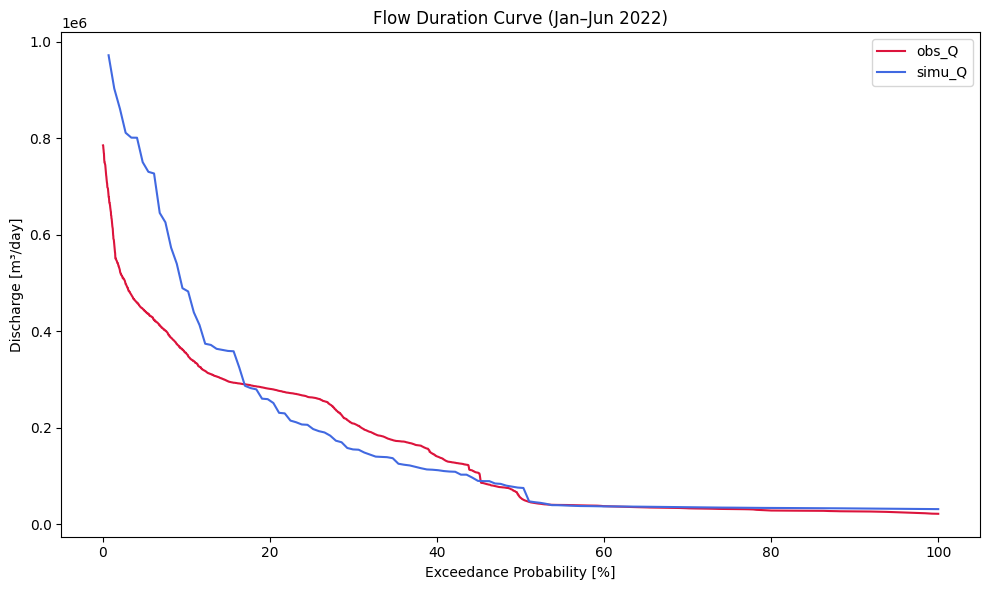

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV files
ats_meter = pd.read_csv('ATS_meter.csv')
discharge = pd.read_csv('Discharge_2021-2023.csv')

# Convert time columns
ats_meter['time [d]'] = pd.to_datetime(ats_meter['time [d]'])
discharge['time'] = pd.to_datetime(discharge['DateTime'])

# Filter to Jan–Jun 2022
start_date = "2022-01-01"
end_date = "2022-06-01"
ats_filtered = ats_meter[(ats_meter['time [d]'] >= start_date) & (ats_meter['time [d]'] <= end_date)]
discharge_filtered = discharge[(discharge['time'] >= start_date) & (discharge['time'] <= end_date)]

# Remove negative discharge values
discharge_filtered = discharge_filtered[discharge_filtered['Discharge_m3_day'] >= 0]
ats_filtered = ats_filtered[ats_filtered['net runoff [m^3 d^-1]'] >= 0]

# Extract discharge series
obs_discharge = discharge_filtered['Discharge_m3_day'].dropna().sort_values(ascending=False).reset_index(drop=True)
simu_discharge = ats_filtered['net runoff [m^3 d^-1]'].dropna().sort_values(ascending=False).reset_index(drop=True)

# Calculate exceedance probability
obs_exceedance = np.arange(1., len(obs_discharge)+1) / len(obs_discharge) * 100
simu_exceedance = np.arange(1., len(simu_discharge)+1) / len(simu_discharge) * 100

# Plot FDC
plt.figure(figsize=(10, 6))
plt.plot(obs_exceedance, obs_discharge, label='obs_Q', color='crimson')
plt.plot(simu_exceedance, simu_discharge, label='simu_Q', color='royalblue')

plt.xlabel('Exceedance Probability [%]')
plt.ylabel('Discharge [m³/day]')
plt.title('Flow Duration Curve (Jan–Jun 2022)')
plt.legend()

plt.tight_layout()

# Save the plot with 600 DPI
plt.savefig('Flow_duration.png', dpi=300)
plt.show()

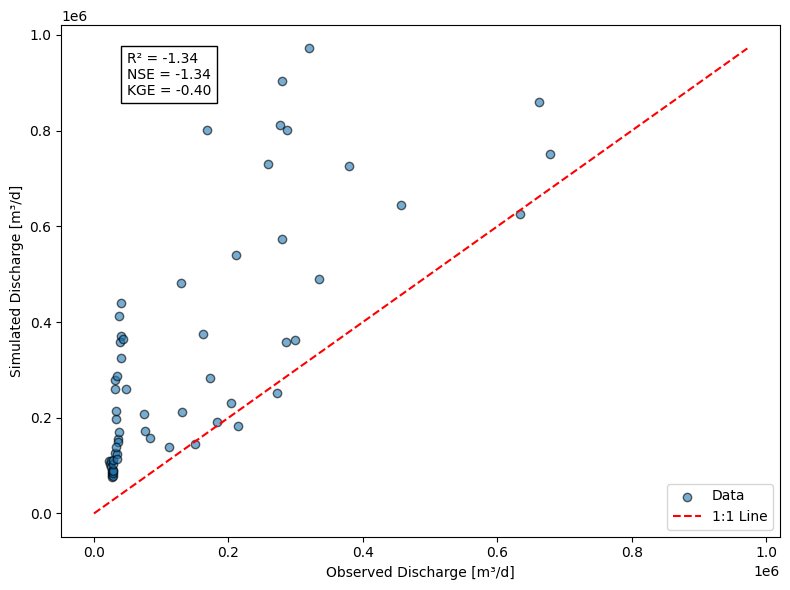

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# NSE Function
def nse(sim, obs):
    return 1 - np.sum((sim - obs)**2) / np.sum((obs - np.mean(obs))**2)

# KGE Function
def kge(sim, obs):
    r = np.corrcoef(sim, obs)[0, 1]
    beta = np.mean(sim) / np.mean(obs)
    alpha = np.std(sim) / np.std(obs)
    return 1 - np.sqrt((r - 1)**2 + (alpha - 1)**2 + (beta - 1)**2)

# Load and filter your data
ats = pd.read_csv("ATS_meter.csv")
obs = pd.read_csv("Discharge_2021-2023.csv")

ats['time [d]'] = pd.to_datetime(ats['time [d]'])
obs['time'] = pd.to_datetime(obs['DateTime'])

# Filter to Jan–Jun 2022
start_date = "2022-01-01"
end_date = "2022-06-01"
ats_filtered = ats[(ats['time [d]'] >= start_date) & (ats['time [d]'] <= end_date)]
obs_filtered = obs[(obs['time'] >= start_date) & (obs['time'] <= end_date)]

# Align time series (inner join on date)
merged = pd.merge(ats_filtered, obs_filtered, left_on='time [d]', right_on='time')
merged = merged[['Discharge_m3_day', 'net runoff [m^3 d^-1]']].dropna()

# Rename for convenience
obs_q = merged['Discharge_m3_day']
sim_q = merged['net runoff [m^3 d^-1]']

# Remove negative values
valid = (obs_q >= 0) & (sim_q >= 0)
obs_q = obs_q[valid]
sim_q = sim_q[valid]

# Calculate metrics
r2 = r2_score(obs_q, sim_q)
nse_val = nse(sim_q.values, obs_q.values)
kge_val = kge(sim_q.values, obs_q.values)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(obs_q, sim_q, alpha=0.6, edgecolor='k', label='Data')
max_val = max(obs_q.max(), sim_q.max())
plt.plot([0, max_val], [0, max_val], 'r--', label='1:1 Line')

# Labels and metrics
plt.xlabel('Observed Discharge [m³/d]')
plt.ylabel('Simulated Discharge [m³/d]')

plt.legend()
plt.text(0.05 * max_val, 0.9 * max_val, f'R² = {r2:.2f}\nNSE = {nse_val:.2f}\nKGE = {kge_val:.2f}', 
         bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
# Save the plot with 600 DPI
plt.savefig('0ne-one plot.png', dpi=300)
plt.show()

/tmp/ipykernel_431/3197211688.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  et_filtered['ET_m'] = pd.to_numeric(et_filtered['ET_m'], errors='coerce')


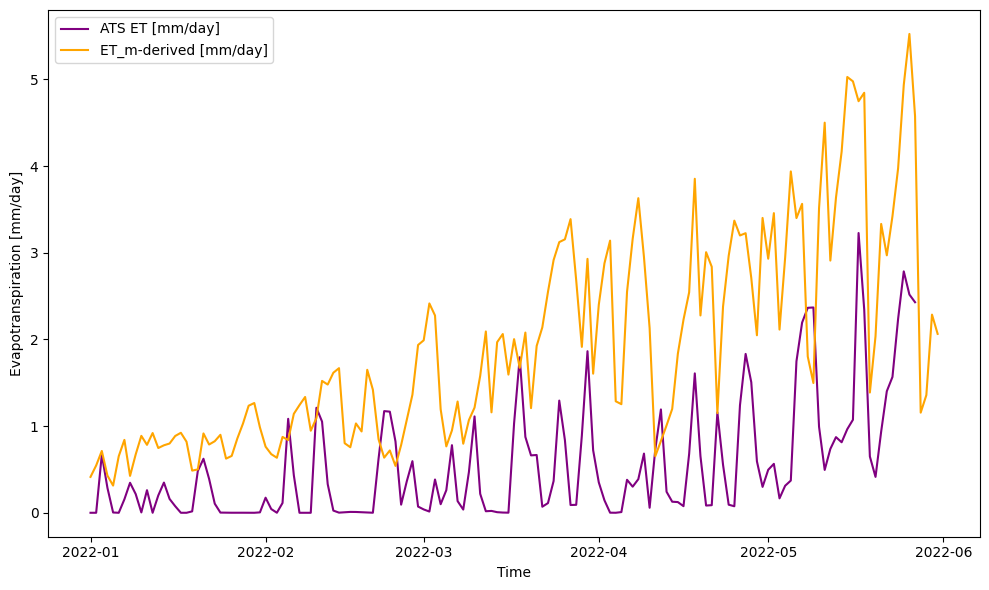

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
ats_meter = pd.read_csv('ATS_meter.csv')
et_data = pd.read_csv('ET_2021-2023.csv')

# Convert time columns to datetime
ats_meter['time [d]'] = pd.to_datetime(ats_meter['time [d]'])
et_data['time'] = pd.to_datetime(et_data['DateTime'])

# Filter for first 6 months of 2022
start_date = "2022-01-01"
end_date = "2022-06-1"

ats_filtered = ats_meter[(ats_meter['time [d]'] >= start_date) & (ats_meter['time [d]'] <= end_date)]
et_filtered = et_data[(et_data['time'] >= start_date) & (et_data['time'] <= end_date)]

# Convert ATS ET from m/d to mm/d
ats_et_mm_day = ats_filtered['total evapotranspiration [m d^-1]'] * 1000
ats_time = ats_filtered['time [d]']

# Convert ET_m from m to mm and group by day to get mm/day
et_filtered['ET_m'] = pd.to_numeric(et_filtered['ET_m'], errors='coerce')
et_filtered = et_filtered[et_filtered['ET_m'] >= 0]  # remove negatives
et_filtered['ET_mm'] = et_filtered['ET_m'] * 1000
et_filtered['Date'] = et_filtered['time'].dt.date

# Daily sum of ET in mm
daily_et = et_filtered.groupby('Date')['ET_mm'].sum().reset_index()
daily_et['Date'] = pd.to_datetime(daily_et['Date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ats_time, ats_et_mm_day, label='ATS ET [mm/day]', color='purple')
plt.plot(daily_et['Date'], daily_et['ET_mm'], label='ET_m-derived [mm/day]', color='orange')

# Labels and title
plt.xlabel('Time')
plt.ylabel('Evapotranspiration [mm/day]')
plt.legend()
plt.tight_layout()

# Save the plot with 600 DPI
plt.savefig('ET.png', dpi=300)
plt.show()

/tmp/ipykernel_431/4245861361.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ats_filtered['ATS_ET_mm_day'] = ats_filtered['total evapotranspiration [m d^-1]'] * 1000
/tmp/ipykernel_431/4245861361.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  et_filtered['ET_m'] = pd.to_numeric(et_filtered['ET_m'], errors='coerce')


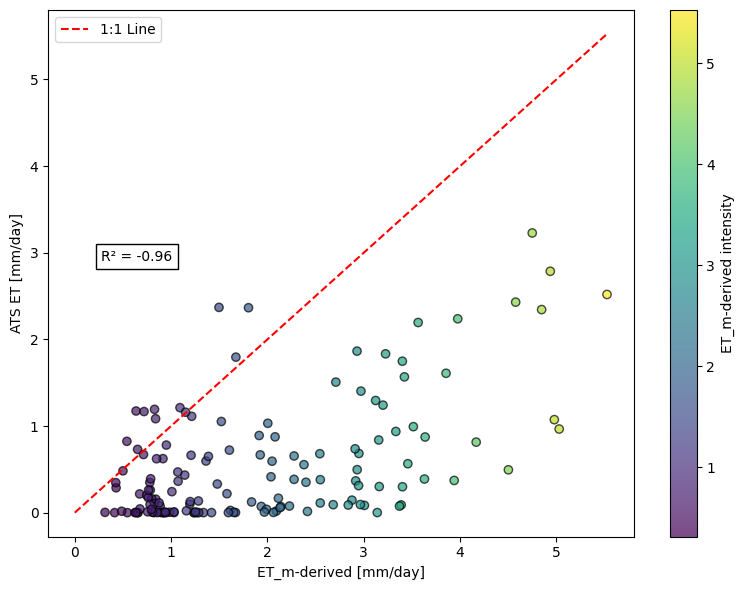

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# --- Load and Prepare Data ---
ats_meter = pd.read_csv('ATS_meter.csv')
et_data = pd.read_csv('ET_2021-2023.csv')

ats_meter['time [d]'] = pd.to_datetime(ats_meter['time [d]'])
et_data['time'] = pd.to_datetime(et_data['DateTime'])

# Filter data
start_date = "2022-01-01"
end_date = "2022-06-01"

ats_filtered = ats_meter[(ats_meter['time [d]'] >= start_date) & (ats_meter['time [d]'] <= end_date)]
et_filtered = et_data[(et_data['time'] >= start_date) & (et_data['time'] <= end_date)]

# ATS: Convert to mm/day
ats_filtered['ATS_ET_mm_day'] = ats_filtered['total evapotranspiration [m d^-1]'] * 1000

# ET_m: clean and convert
et_filtered['ET_m'] = pd.to_numeric(et_filtered['ET_m'], errors='coerce')
et_filtered = et_filtered[et_filtered['ET_m'] >= 0]
et_filtered['ET_mm'] = et_filtered['ET_m'] * 1000
et_filtered['Date'] = et_filtered['time'].dt.date

# Group ET_m by day
daily_et = et_filtered.groupby('Date')['ET_mm'].sum().reset_index()
daily_et['Date'] = pd.to_datetime(daily_et['Date'])

# Align datasets by date
ats_daily = ats_filtered[['time [d]', 'ATS_ET_mm_day']].copy()
ats_daily['Date'] = ats_daily['time [d]'].dt.date
ats_daily = ats_daily.groupby('Date')['ATS_ET_mm_day'].mean().reset_index()
ats_daily['Date'] = pd.to_datetime(ats_daily['Date'])

# Merge both ET sources
merged = pd.merge(ats_daily, daily_et, on='Date', how='inner')
merged = merged[(merged['ATS_ET_mm_day'] >= 0) & (merged['ET_mm'] >= 0)]

# --- Metrics and Scatter Plot ---
r2 = r2_score(merged['ET_mm'], merged['ATS_ET_mm_day'])

plt.figure(figsize=(8, 6))
sc = plt.scatter(merged['ET_mm'], merged['ATS_ET_mm_day'], c=merged['ET_mm'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.plot([0, max(merged['ET_mm'].max(), merged['ATS_ET_mm_day'].max())],
         [0, max(merged['ET_mm'].max(), merged['ATS_ET_mm_day'].max())],
         'r--', label='1:1 Line')

plt.xlabel('ET_m-derived [mm/day]')
plt.ylabel('ATS ET [mm/day]')
plt.colorbar(sc, label='ET_m-derived intensity')
plt.legend()

# Show metrics on plot
plt.text(0.05 * merged['ET_mm'].max(), 0.9 * merged['ATS_ET_mm_day'].max(), f'R² = {r2:.2f}',
         bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.savefig('ET_1to1_density.png', dpi=300)
plt.show()

/tmp/ipykernel_431/3611912220.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snow_filtered_cleaned['Snow_mm'] = snow_filtered_cleaned['Snow_m'] * 1000


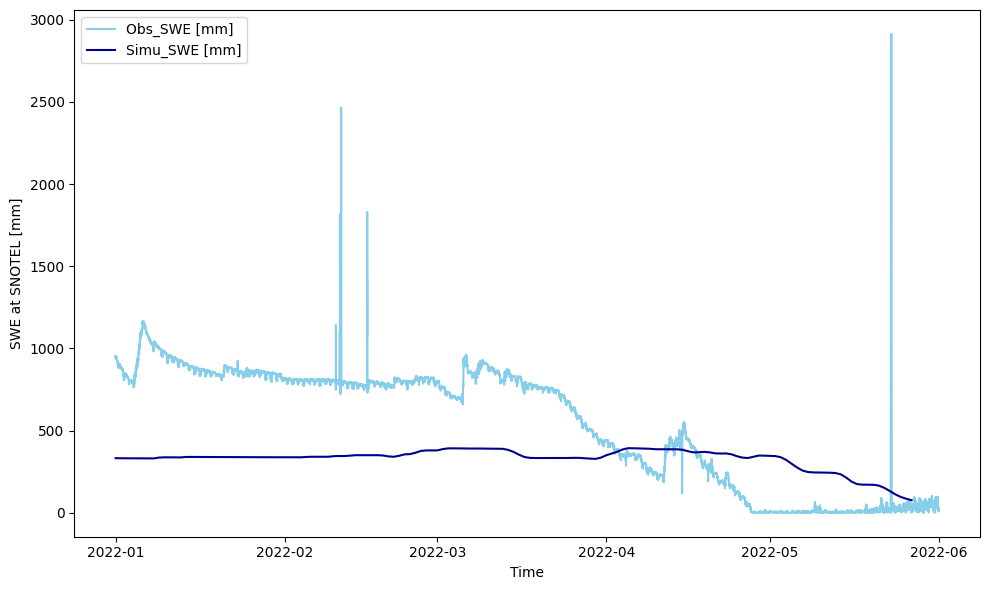

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
snow_depth = pd.read_csv('Snow_2021-2023.csv')
ats_meter = pd.read_csv('ATS_meter.csv')

# Convert time columns to datetime
snow_depth['time'] = pd.to_datetime(snow_depth['DateTime'])  # adjust column name if needed
ats_meter['time [d]'] = pd.to_datetime(ats_meter['time [d]'])

# Filter for the same date range
start_date = "2022-01-01"
end_date = "2022-06-01"

snow_filtered = snow_depth[(snow_depth['time'] >= start_date) & (snow_depth['time'] <= end_date)]
ats_filtered = ats_meter[(ats_meter['time [d]'] >= start_date) & (ats_meter['time [d]'] <= end_date)]

# Remove missing or negative values and convert to mm
snow_filtered_cleaned = snow_filtered[(snow_filtered['Snow_m'] >= 0) & (snow_filtered['Snow_m'].notna())]
ats_filtered_cleaned = ats_filtered[(ats_filtered['snow water equivalent [m]'] >= 0) & (ats_filtered['snow water equivalent [m]'].notna())]

# Convert to mm
snow_filtered_cleaned['Snow_mm'] = snow_filtered_cleaned['Snow_m'] * 1000
ats_filtered_cleaned['SWE_mm'] = ats_filtered_cleaned['snow water equivalent [m]'] * 1000

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(snow_filtered_cleaned['time'], snow_filtered_cleaned['Snow_mm'], label='Obs_SWE [mm]', color='skyblue')
plt.plot(ats_filtered_cleaned['time [d]'], ats_filtered_cleaned['SWE_mm'], label='Simu_SWE [mm]', color='darkblue')

# Labels and title
plt.xlabel('Time')
plt.ylabel('SWE at SNOTEL [mm]')

plt.legend()
plt.tight_layout()

plt.show()

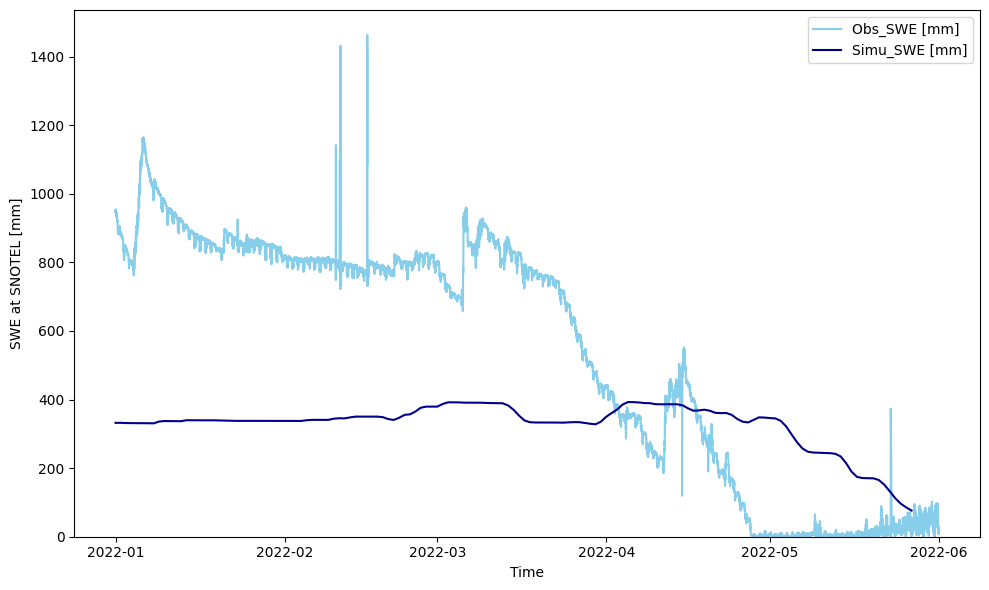

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
snow_depth = pd.read_csv('Snow_2021-2023.csv')
ats_meter = pd.read_csv('ATS_meter.csv')

# Convert time columns to datetime
snow_depth['time'] = pd.to_datetime(snow_depth['DateTime'])  # adjust column name if needed
ats_meter['time [d]'] = pd.to_datetime(ats_meter['time [d]'])

# Filter for the same date range
start_date = "2022-01-01"
end_date = "2022-06-01"

snow_filtered = snow_depth[(snow_depth['time'] >= start_date) & (snow_depth['time'] <= end_date)]
ats_filtered = ats_meter[(ats_meter['time [d]'] >= start_date) & (ats_meter['time [d]'] <= end_date)]

# Remove negative, NaN, and extreme values, then convert to mm
snow_filtered_cleaned = snow_filtered[
    (snow_filtered['Snow_m'] >= 0) &
    (snow_filtered['Snow_m'].notna()) &
    (snow_filtered['Snow_m'] * 1000 <= 1500)
].copy()
ats_filtered_cleaned = ats_filtered[
    (ats_filtered['snow water equivalent [m]'] >= 0) &
    (ats_filtered['snow water equivalent [m]'].notna()) &
    (ats_filtered['snow water equivalent [m]'] * 1000 <= 1500)
].copy()

# Convert to mm
snow_filtered_cleaned['Snow_mm'] = snow_filtered_cleaned['Snow_m'] * 1000
ats_filtered_cleaned['SWE_mm'] = ats_filtered_cleaned['snow water equivalent [m]'] * 1000

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(snow_filtered_cleaned['time'], snow_filtered_cleaned['Snow_mm'], label='Obs_SWE [mm]', color='skyblue')
plt.plot(ats_filtered_cleaned['time [d]'], ats_filtered_cleaned['SWE_mm'], label='Simu_SWE [mm]', color='darkblue')

# Set linear scale and y-axis starting from 0
plt.ylim(bottom=0)

# Labels and title
plt.xlabel('Time')
plt.ylabel('SWE at SNOTEL [mm]')
plt.legend()

plt.tight_layout()
# Save the plot with 600 DPI
plt.savefig('Snow.png', dpi=300)
plt.show()

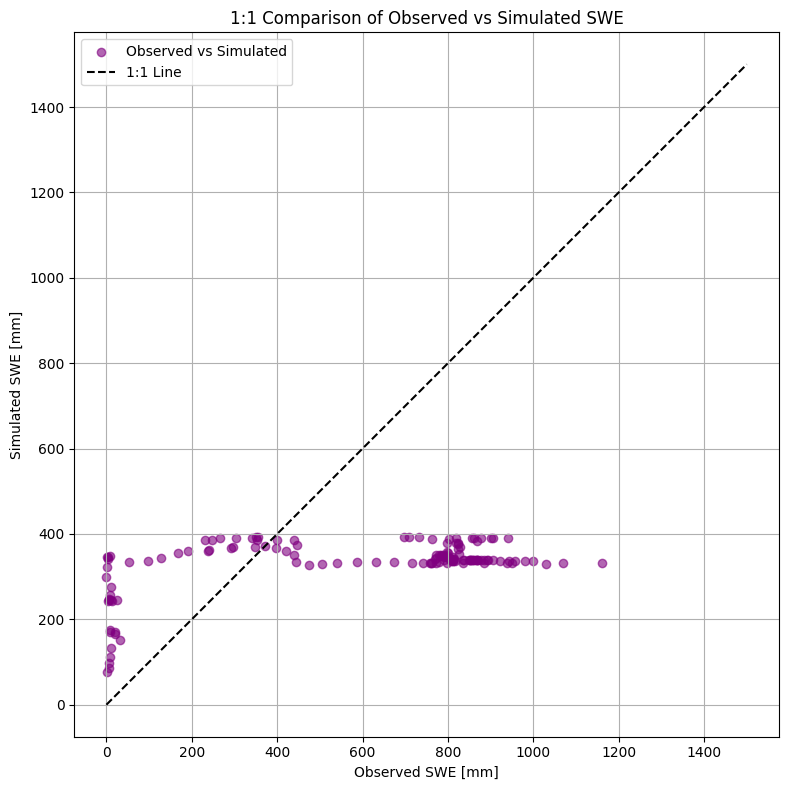

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
snow_depth = pd.read_csv('Snow_2021-2023.csv')
ats_meter = pd.read_csv('ATS_meter.csv')

# Convert time columns to datetime
snow_depth['time'] = pd.to_datetime(snow_depth['DateTime'])  # adjust column name if needed
ats_meter['time [d]'] = pd.to_datetime(ats_meter['time [d]'])

# Filter for the same date range
start_date = "2022-01-01"
end_date = "2022-06-01"

snow_filtered = snow_depth[(snow_depth['time'] >= start_date) & (snow_depth['time'] <= end_date)]
ats_filtered = ats_meter[(ats_meter['time [d]'] >= start_date) & (ats_meter['time [d]'] <= end_date)]

# Remove negative, NaN, and extreme values, then convert to mm
snow_filtered_cleaned = snow_filtered[
    (snow_filtered['Snow_m'] >= 0) &
    (snow_filtered['Snow_m'].notna()) &
    (snow_filtered['Snow_m'] * 1000 <= 1500)
].copy()
ats_filtered_cleaned = ats_filtered[
    (ats_filtered['snow water equivalent [m]'] >= 0) &
    (ats_filtered['snow water equivalent [m]'].notna()) &
    (ats_filtered['snow water equivalent [m]'] * 1000 <= 1500)
].copy()

# Convert to mm
snow_filtered_cleaned['Snow_mm'] = snow_filtered_cleaned['Snow_m'] * 1000
ats_filtered_cleaned['SWE_mm'] = ats_filtered_cleaned['snow water equivalent [m]'] * 1000

# Align the data (make sure the times are the same)
merged_data = pd.merge(snow_filtered_cleaned[['time', 'Snow_mm']], ats_filtered_cleaned[['time [d]', 'SWE_mm']], 
                       left_on='time', right_on='time [d]', how='inner')

# Plotting 1:1 comparison
plt.figure(figsize=(8, 8))
plt.scatter(merged_data['Snow_mm'], merged_data['SWE_mm'], label='Observed vs Simulated', color='purple', alpha=0.6)

# Add the 1:1 line
plt.plot([0, 1500], [0, 1500], 'k--', label='1:1 Line')

# Set plot labels and title
plt.xlabel('Observed SWE [mm]')
plt.ylabel('Simulated SWE [mm]')
plt.title('1:1 Comparison of Observed vs Simulated SWE')

# Add legend
plt.legend()

# Set equal scaling and grid
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)

# Save the plot with 600 DPI
plt.tight_layout()
plt.savefig('SWE_1_1_Comparison.png', dpi=300)
plt.show()